# 2.Using steepest gradient descent, find all the local minima for the function  J(x1, x2) = (x1^2+x2−11)^2+(x1+x2^2−7)^2. While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show one of the minimal point.


IMP NOTE: Plan your coding in such a way so that you can reuse them (use classes / functions). For example, code developed last week can be used to solve part of problem 2. Similarly, when you do the problems in ML, both multivariable and single variable optimization play greater role. You can use most of the code that you write today to do the problems in the coming weeks. 

# (a)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def J(x1, x2):
    return (x1 ** 2 + x2 - 11) ** 2 + (x1 + x2 ** 2 - 7) ** 2

class gradient_descent:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        self.path = [(x1, x2)]  # initializing path with starting point

    def gradJ(self, x1, x2):
        grad1 = 4 * x1 * (x1 ** 2 + x2 - 11) + 2 * (x1 + x2 ** 2 - 7)
        grad2 = 2 * (x1 ** 2 + x2 - 11) + 4 * x2 * (x1 + x2 ** 2 - 7)
        return np.array([grad1, grad2])

    def do_descent(self, alpha, max_iterations=10000):
        X = np.array([self.x1, self.x2])
        iterations = 0    
        while np.linalg.norm(self.gradJ(X[0], X[1])) > 0.0001 and iterations < max_iterations:
            grad = self.gradJ(X[0], X[1])
            X = X - alpha * grad
            self.path.append((X[0], X[1]))  # storing current position
            iterations += 1
        self.path = np.array(self.path)  # converting path to NumPy array for plotting
#         print(self.path)  #contains all the iterative points in a 2d array, each row is a point 
#         print(self.path[:, 1]) # contains all the y_coordinates of the iterative points in a list
#         print(*self.path[0])  #the initial point
#         print(*self.path[-1])  #the end point
        return X

In [2]:
model1 = gradient_descent(-3,-3)  #object of class with initial point (-3,-3)
result1 = model1.do_descent(0.001)  #gives the final minimizer of the function
print("1st Minimum point (w1, w2):", result1)
print("Minimum value of J(w1, w2) at the 1st point:", J(*result1))

1st Minimum point (w1, w2): [-3.77930955 -3.28318486]
Minimum value of J(w1, w2) at the 1st point: 6.266470931593154e-11


In [3]:
model2 = gradient_descent(-3,1)
result2 = model2.do_descent(0.001)
print("2nd Minimum point (w1, w2):", result2)
print("Minimum value of J(w1, w2) at the 2nd point:", J(*result2))

2nd Minimum point (w1, w2): [-2.80511788  3.13131135]
Minimum value of J(w1, w2) at the 2nd point: 5.581568461191939e-11


In [4]:
model3 = gradient_descent(3,1.5)
result3 = model3.do_descent(0.001)
print("3rd Minimum point (w1, w2):", result3)
print("Minimum value of J(w1, w2) at the 3rd point:", J(*result3))

3rd Minimum point (w1, w2): [3.00000146 1.99999647]
Minimum value of J(w1, w2) at the 3rd point: 1.8721448991859458e-10


In [5]:
model4 = gradient_descent(3.5,-1)
result4 = model4.do_descent(0.001)
print("4th Minimum point (w1, w2):", result4)
print("Minimum value of J(w1, w2) at the 4th point:", J(*result4))

4th Minimum point (w1, w2): [ 3.58442803 -1.84812308]
Minimum value of J(w1, w2) at the 4th point: 1.7194953760896036e-10


In [6]:
#for plotting the path of the gradient descent algo
def descent_path(model, title='Gradient Descent Path'):
    # the grid for the contour plot
    x = np.linspace(-5, 5, 400)
    y = np.linspace(-5, 5, 400)
    X, Y = np.meshgrid(x, y)
    Z = J(X, Y)

    # contour plot
    plt.figure(figsize=(10, 6))
    plt.contour(X, Y, Z, levels=30)
    
    # descent path plot
    plt.plot(model.path[:, 0], model.path[:, 1], 'o-', color='red', markersize=1, linewidth=2, label='Descent Path')
#     print(*model.path[-1])  # for end point
    plt.scatter(*model.path[0], color='green', s=100,label='Start') #s=100 for the point marking green and red
    plt.scatter(*model.path[-1], color='blue', s=100, label='End')
    
    plt.title(title)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.show()

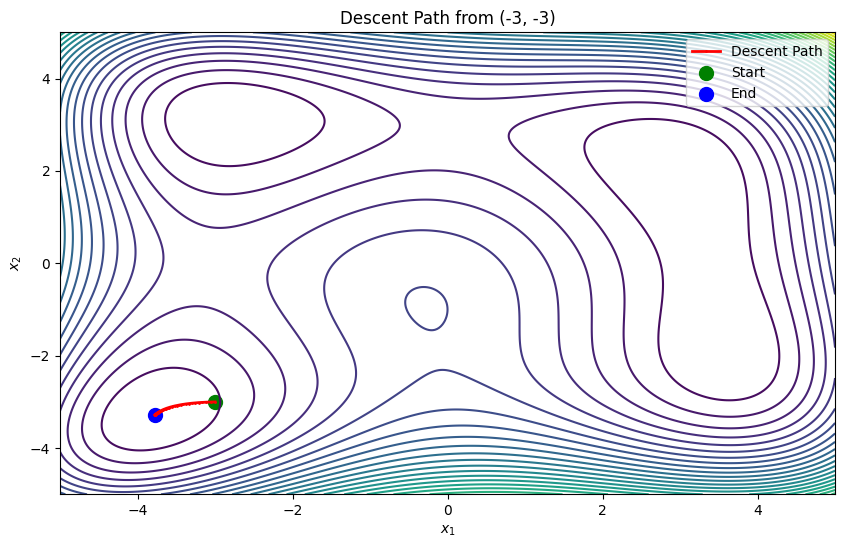

In [7]:
descent_path(model1, "Descent Path from (-3, -3)")

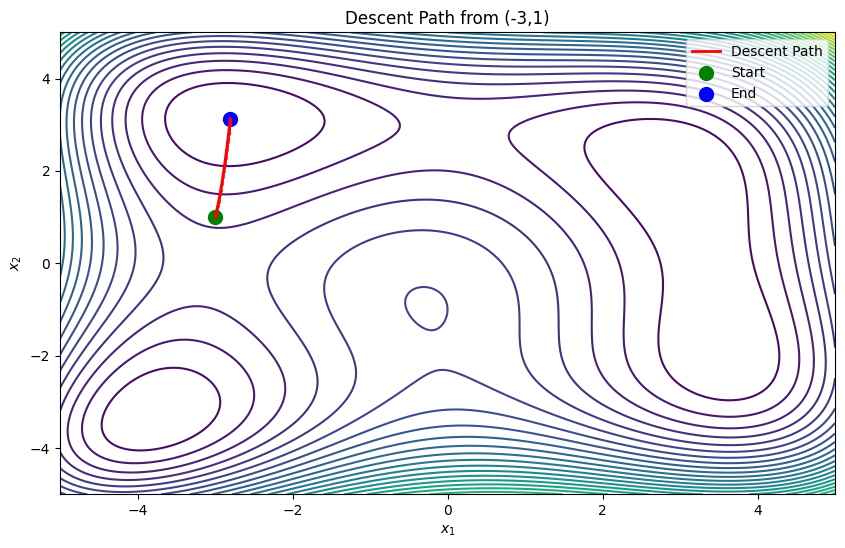

In [8]:
descent_path(model2, "Descent Path from (-3,1)")

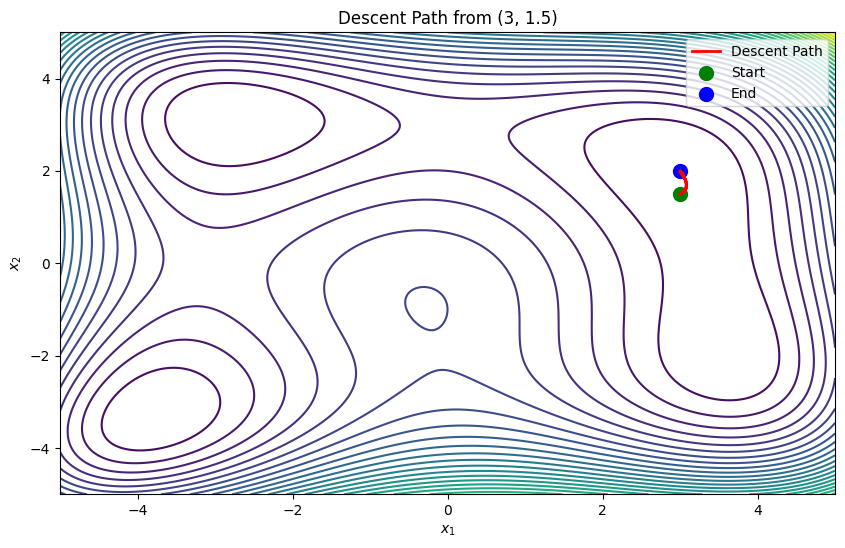

In [9]:
descent_path(model3, "Descent Path from (3, 1.5)")

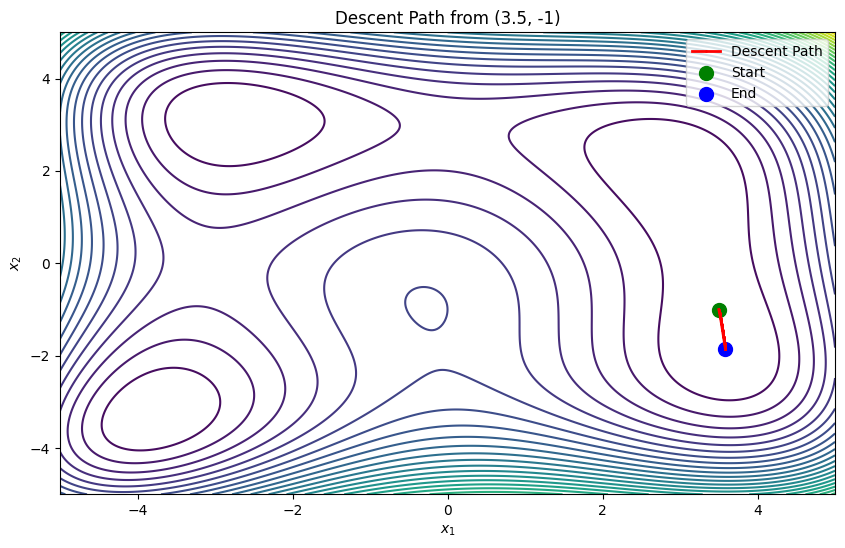

In [10]:
descent_path(model4, "Descent Path from (3.5, -1)")

# (b)

In [84]:
import numpy as np

def J(x1, x2):
    return (x1 ** 2 + x2 - 11) ** 2 + (x1 + x2 ** 2 - 7) ** 2

class gradient_descent_with_linesearch:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        self.path = [(x1, x2)]  # initializing with starting point

    def gradJ(self, x1, x2):
        grad1 = 4 * x1 * (x1 ** 2 + x2 - 11) + 2 * (x1 + x2 ** 2 - 7)
        grad2 = 2 * (x1 ** 2 + x2 - 11) + 4 * x2 * (x1 + x2 ** 2 - 7)
        return np.array([grad1, grad2])
    
    def interval_halving(self, alpha_finder_func, a, b, epsilon=1e-5):
        c = (a + b) / 2
        while (b - a) / 2 > epsilon:
            c = (a + b) / 2
            fc = alpha_finder_func(c)
            fa = alpha_finder_func(a)
            fb = alpha_finder_func(b)
            if fa < fc:
                b = c
                c = (a + b) / 2
            elif fb < fc:
                a = c
                c = (a + b) / 2
            else:
                a = a + (c - a) / 2
                b = b - (b - c) / 2
        return (a + b) / 2

    def do_descent(self, max_iterations=10000, epsilon=1e-5):
        X = np.array([self.x1, self.x2])
        iterations = 0
        while np.linalg.norm(self.gradJ(X[0], X[1])) > epsilon and iterations < max_iterations:
            grad = self.gradJ(X[0], X[1])
            finds_alpha = lambda alpha: J(*(X - alpha * grad))  #for finding alpha in each iteration
            alpha = self.interval_halving(finds_alpha, 0, 1)  # [0, 1] initial point
            X = X - alpha * grad
            self.path.append((X[0], X[1]))  # storing current position
            iterations += 1
        self.path = np.array(self.path)  # converting path to NumPy array for plotting
        return X

Minimum point (x1, x2): [-3.77931024 -3.28318596]
Minimum value of J(x1, x2): 3.952433452665727e-14


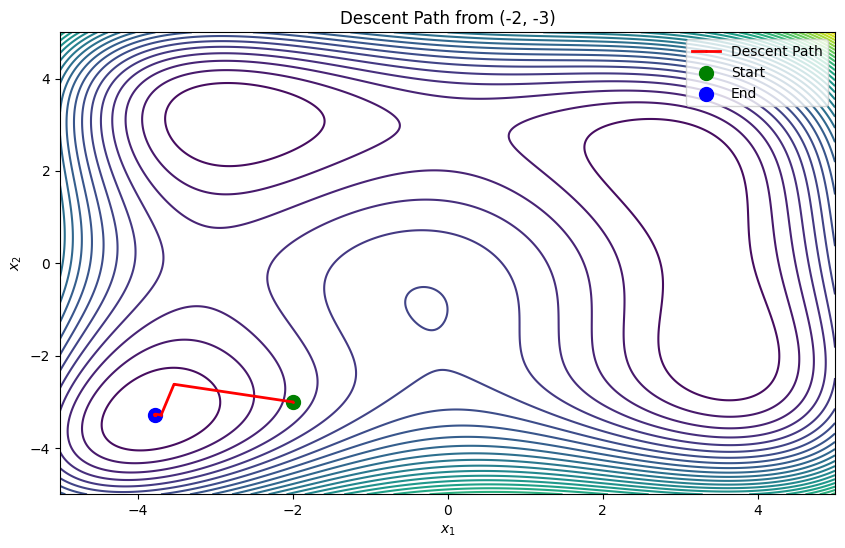

In [96]:
# Initial conditions and testing the implementation
model11 = gradient_descent_with_linesearch(-2, -3)  #object of class with initial point (-2,-3)
result11 = model11.do_descent()  #gives the final minimizer of the function
print("Minimum point (x1, x2):", result11)
print("Minimum value of J(x1, x2):", J(*result11))

descent_path(model11, "Descent Path from (-2, -3)")

Minimum point (x1, x2): [ 3.58442833 -1.84812644]
Minimum value of J(x1, x2): 1.0120298096686524e-13


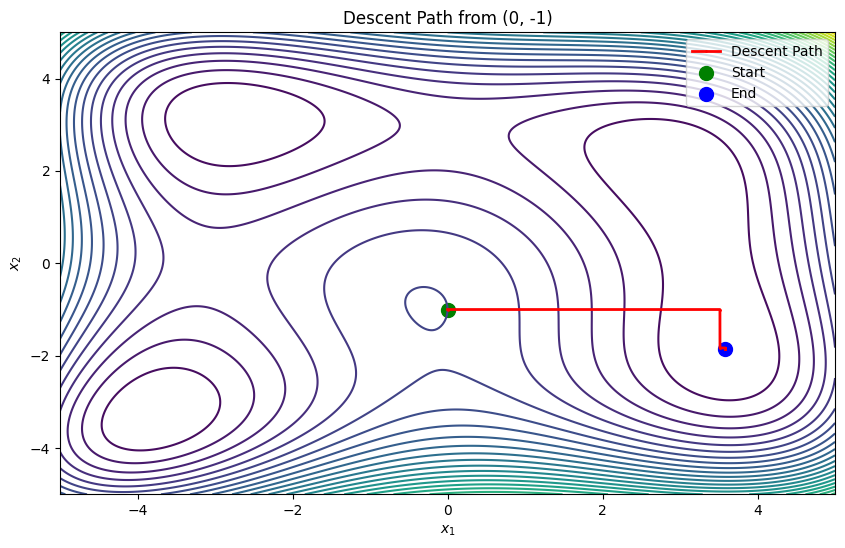

In [97]:
# Initial conditions and testing the implementation
model12 = gradient_descent_with_linesearch(0, -1)
result12 = model12.do_descent()
print("Minimum point (x1, x2):", result12)
print("Minimum value of J(x1, x2):", J(*result12))

descent_path(model12, "Descent Path from (0, -1)")

Minimum point (x1, x2): [3.00000012 1.9999999 ]
Minimum value of J(x1, x2): 4.3408140273842353e-13


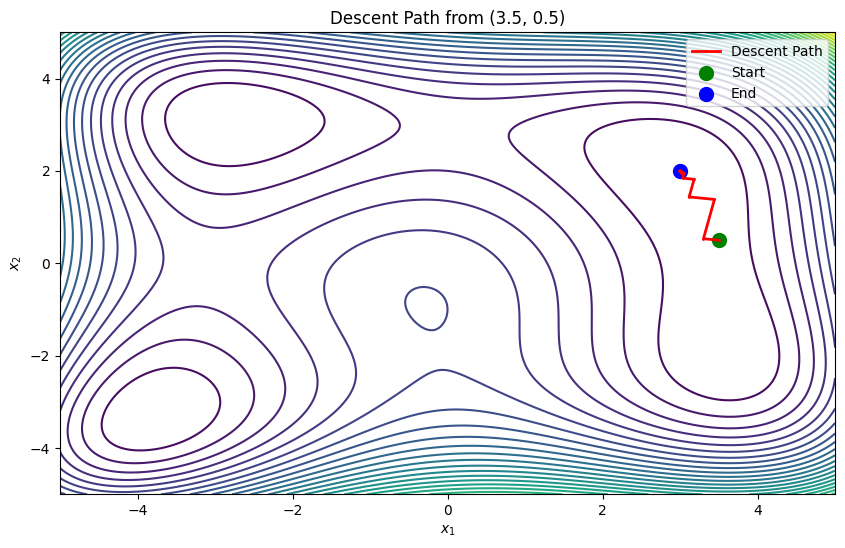

In [98]:
# Initial conditions and testing the implementation
model13 = gradient_descent_with_linesearch(3.5, 0.5)
result13 = model13.do_descent()
print("Minimum point (x1, x2):", result13)
print("Minimum value of J(x1, x2):", J(*result13))

descent_path(model13, "Descent Path from (3.5, 0.5)") 

Minimum point (x1, x2): [-2.80511803  3.1313125 ]
Minimum value of J(x1, x2): 1.0957117875559875e-13


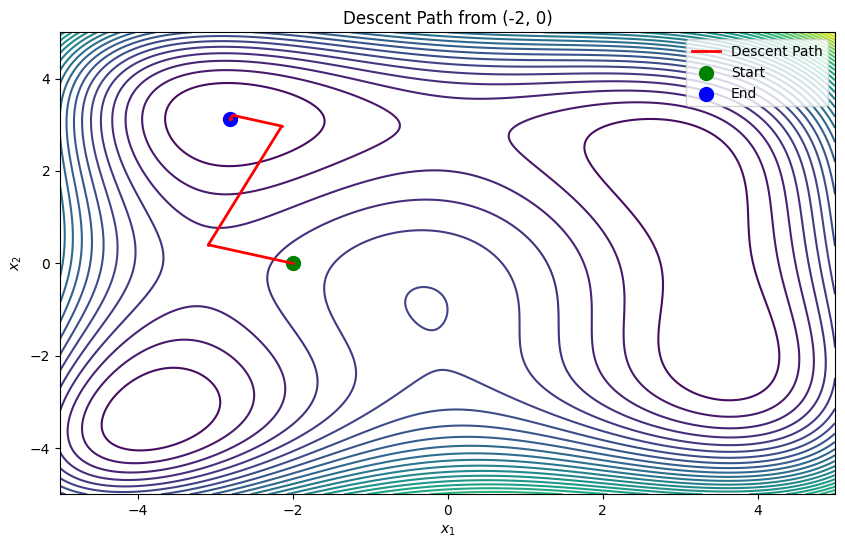

In [99]:
# Initial conditions and testing the implementation
model14 = gradient_descent_with_linesearch(-2, 0)
result14 = model14.do_descent()
print("Minimum point (x1, x2):", result14)
print("Minimum value of J(x1, x2):", J(*result14))

descent_path(model14, "Descent Path from (-2, 0)")  